# Determine brand markup, pricing strategies and trends for non-luxury and luxury brands.

## Step 1. Import libraries needed for EDA (exploratory data analysis)

In [2]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [4]:
#https://data.world/datafiniti/womens-shoe-prices

In [3]:
df = pd.read_csv("7210_1.csv")

/Users/isabellechung/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (13,16,18,22,24,32,33,40,41,47,51) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Step 2. Load dataset & display the first 3 rows

In [4]:
df.head(3)

,id,asins,brand,categories,colors,count,dateAdded,dateUpdated,descriptions,dimension,...,skus,sourceURLs,upc,vin,websiteIDs,weight,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Step 3. Get a summary of the data

In [6]:
#print(df.info())
#print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33801 entries, 0 to 33800
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   33801 non-null  object 
 1   asins                2422 non-null   object 
 2   brand                32817 non-null  object 
 3   categories           33801 non-null  object 
 4   colors               19844 non-null  object 
 5   count                0 non-null      float64
 6   dateAdded            33801 non-null  object 
 7   dateUpdated          33801 non-null  object 
 8   descriptions         28425 non-null  object 
 9   dimension            1177 non-null   object 
 10  ean                  9778 non-null   float64
 11  features             27181 non-null  object 
 12  flavors              0 non-null      float64
 13  imageURLs            22309 non-null  object 
 14  isbn                 0 non-null      float64
 15  keys                 33801 non-null 

In [5]:
# Create new column for average price
df['prices.avg'] = (df['prices.amountMin'] + df['prices.amountMax'])/2
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33801 entries, 0 to 33800
Data columns (total 53 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   33801 non-null  object 
 1   asins                2422 non-null   object 
 2   brand                32817 non-null  object 
 3   categories           33801 non-null  object 
 4   colors               19844 non-null  object 
 5   count                0 non-null      float64
 6   dateAdded            33801 non-null  object 
 7   dateUpdated          33801 non-null  object 
 8   descriptions         28425 non-null  object 
 9   dimension            1177 non-null   object 
 10  ean                  9778 non-null   float64
 11  features             27181 non-null  object 
 12  flavors              0 non-null      float64
 13  imageURLs            22309 non-null  object 
 14  isbn                 0 non-null      float64
 15  keys                 33801 non-null 

In [8]:
print(df[df['prices.currency']=='GBP']['prices.avg'])
print(df[df['prices.currency']=='GBP']['prices.currency'])

9336    94.99
Name: prices.avg, dtype: float64
9336    GBP
Name: prices.currency, dtype: object


In [21]:
s = "abc123AUG|GAC|UGAasdfg789"
pattern = "AUG\|(.*?)\|UGA"

substring = re.search(pattern, s).group(1)
print(substring)

GAC


In [24]:
s = "https://www.overstock.com/Worldstock-Fair-Trade"
pattern = "https://www.(.*?).com"

substring = re.search(pattern, s).group(1)
print(substring)

overstock


In [16]:
import re

s = 'asdf=5;iwantthis123jasd'
result = re.search('asdf=5;(.*)123jasd', s)
print(result.group(1))

iwantthis


In [6]:
df['sourceURLs'].unique()

array(['https://www.overstock.com/Worldstock-Fair-Trade/Handcrafted-Alpaca-Blend-Purple-Charisma-Sweater-Peru/12420822/product.html,https://www.overstock.com/Worldstock-Fair-Trade/Handcrafted-Alpaca-Blend-Purple-Charisma-Sweater-Peru/12420822/customer-reviews.html',
       'https://www.walmart.com/ip/PEDI-COUTURE-Women-s-Blue-Snake-Pedicure-Spa-Toe-Separator-Sandal-Flip-Flops-M/48428527',
       'http://www.walmart.com/ip/Anne-Klein-Sport-Perfered-Women-US-9.5-Nude-Open-Toe-Wedge-Heel/49625175',
       ...,
       'https://www.overstock.com/Worldstock-Fair-Trade/Handcrafted-Acrylic-Alpaca-Blend-Red-Dreamcatcher-Tunic-Peru/14410557/product.html',
       'https://www.amazon.com/City-Classified-Womens-Closed-Chunky/dp/B06XZK4HQ6/ref=sr_1_288/147-1663988-9229202?ie=UTF8&qid=1491841989&sr=8-288&keywords=Black,https://www.amazon.com/City-Classified-Womens-Closed-Chunky/dp/B06XZK4HQ6/ref=sr_1_276/145-3420254-9445165?ie=UTF8&qid=1491848944&sr=8-276&keywords=Black,https://www.amazon.com/City-Cl

In [15]:
for line in df['sourceURLs']:
    print(line.split('.com')[0].split('.ca')[0].split('.')[1])

overstock
overstock
overstock
overstock
overstock
overstock
overstock
walmart
walmart
walmart
walmart
walmart
amazon
walmart
walmart
walmart
walmart
walmart
walmart
walmart
walmart
walmart
overstock
overstock
overstock
overstock
overstock
overstock
overstock
overstock
overstock
walmart
walmart
walmart
amazon
walmart
walmart
walmart
ebay
sportsauthority
overstock
overstock
overstock
overstock
walmart
walmart
walmart
walmart
walmart
walmart
walmart
walmart
walmart
walmart
walmart
walmart
walmart
walmart
walmart
walmart
walmart
walmart
walmart
walmart
walmart
walmart
ebay
ebay
walmart
walmart
walmart
walmart
walmart
sportsauthority
walmart
walmart
walmart
walmart
walmart
walmart
amazon
walmart
walmart
walmart
amazon
walmart
walmart
walmart
walmart
walmart
walmart
walmart
walmart
walmart
amazon
walmart
walmart
walmart
walmart
sears
sears
sears
amazon
ebay
walmart
walmart
walmart
overstock
overstock
overstock
overstock
overstock
overstock
overstock
overstock
overstock
overstock
overstock
ov

IndexError: list index out of range

In [46]:
f = lambda x: x['sourceURLs'].split('.com')[0].split('.ca')[0].split('.co.uk')[0].lstrip('htps:/.').split('.')[-1]
df['source'] = df.apply(f, axis=1)

In [47]:
df['source'].unique()

array(['overstock', 'walmart', 'amazon', 'ebay', 'sportsauthority',
       'sears', 'nordstrom', 'shoes', 'ralphlauren', 'newegg',
       'gandermountain', 'puma', '', 'kmart', 'homedepot', 'bergners',
       'dickssportinggoods', 'www', 'macys', 'buy'], dtype=object)

In [51]:
source_df = df['source'].value_counts()
source_df

overstock             18495
walmart               10018
amazon                 1916
ralphlauren             985
ebay                    914
sears                   747
nordstrom               378
shoes                   106
sportsauthority          89
puma                     87
gandermountain           24
newegg                   11
bergners                 10
buy                       6
kmart                     4
                          4
www                       2
macys                     2
homedepot                 2
dickssportinggoods        1
Name: source, dtype: int64

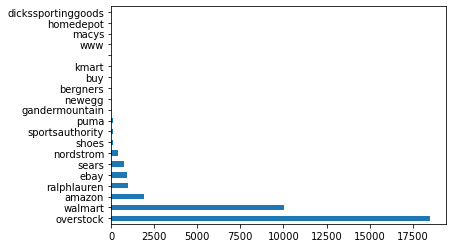

In [52]:
#ax = sns.barplot(x="prices.avg", y="brand", data=df_mean_price)
CountStatus = pd.value_counts(df['source'].values, sort=True)
CountStatus.plot.barh()

# do luxury brands don't really go on sale

## Since we have five different currencies, we need to convert them all into USD.

In [148]:
# Convert currencies to USD
df.loc[df['prices.currency']=='GBP', 'prices.avg'] *= 1.3
df.loc[df['prices.currency']=='AUD', 'prices.avg'] *= .75
df.loc[df['prices.currency']=='CAD', 'prices.avg'] *= .73
df.loc[df['prices.currency']=='EUR', 'prices.avg'] *= 1.1

## We have several columns that don't have *any* values, such as *count*, *flavors*, *isbn*, etc., as well as the last four columns that are unnamed. We will clean the dataset and get it ready for analysis by dropping irrelevant columns, dealing with NAs and duplicates, etc. 

In [150]:
df = df[['id','name','brand','manufacturer','prices.currency','prices.isSale','prices.amountMin','prices.avg','categories','sizes','colors','features','reviews', 'sourceURLs','weight']]
df = df.drop_duplicates()
print(df.isnull().sum())

id                      0
name                    0
brand                 983
manufacturer        11570
prices.currency         0
prices.isSale           0
prices.amountMin        0
prices.avg              0
categories              0
sizes               13404
colors               8009
features             3132
reviews             17901
sourceURLs              0
weight              19278
dtype: int64


## Which product was most expensive? most common?

### We can see below that the prices are extremely skewed to the right, meaning that there are some shoes that are *much* more expensive than others. It also tells us that most shoe prices range between \\$0-\\$200, but many go far beyond that range. 

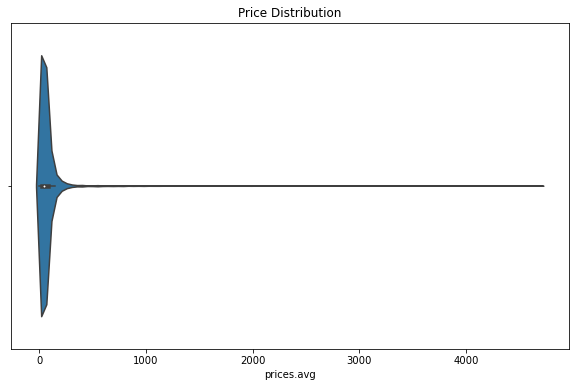

In [151]:
# Is there a typical price distribution (e.g.,normal) across brands or within specific brands?
plt.figure(figsize=(10,6))
plt.title("Price Distribution")
#sns.boxplot(x=df['prices.amountMin'])
sns.axes_style("dark")
sns.violinplot(x=df["prices.avg"])
plt.show()

Text(0.5, 1.0, 'Distplot of prices.amountMin')

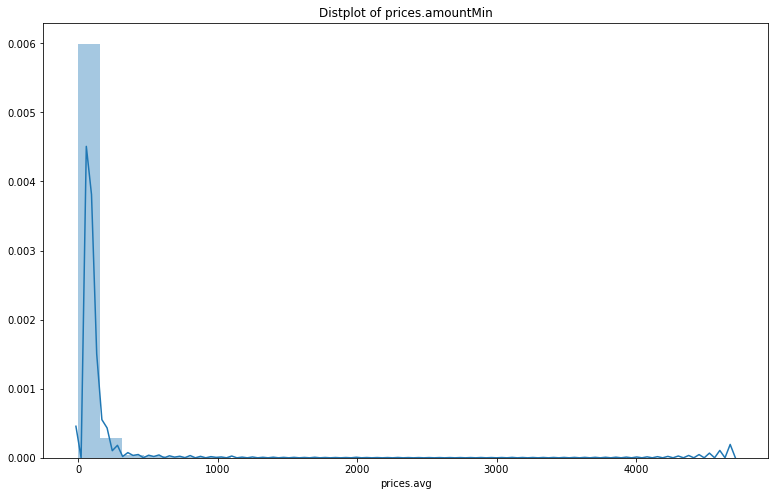

In [152]:
plt.figure(1 , figsize = (13 , 8))
sns.distplot(df['prices.avg'] , bins = 30)
plt.title('Distplot of {}'.format('prices.amountMin'))

## Let's sort the brands by each of their average prices. The table below shows the 5 most expensive brands and the 5 cheapest brands. Interestingly, the most expensive brand is "JewelsObsession" which does not sound like a shoe brand. We will investigate further below.

In [153]:
pd.DataFrame(df.groupby(['brand'])['prices.avg'].mean()).sort_values(by='prices.avg', ascending=False)

,prices.avg
brand,
JewelsObsession,3100.656667
Valentino,1241.110000
Simone Rocha,1120.000000
MALONE SOULIERS,1100.000000
Nicholas Kirkwood,1095.000000
...,...
Tred Mates,3.010000
TOUCHSTONE,2.992500
La Blanca,2.750000


## The price range is clearly very wide for the entire dataset. To get a more granular view of our data, let's split brands into 3 segments: cheap, mid-range, and luxury.

In [169]:
# if prices is between 0 and 100: cheap 
# if prices is between 100 and 400: mid-range
# if prices is greater than 400: luxury

def divide(row):
    if row['prices.avg'] <= 100:
        val = 'cheap'
    elif row['prices.avg'] > 100 and row['prices.avg'] <= 400: 
        val = 'mid-range'
    else:
        val = 'luxury'
    return val

df['prices.avg'] = pd.to_numeric(df['prices.avg'])
df['price_category'] = df.apply(divide, axis=1)

In [172]:
df.head()

,id,name,brand,manufacturer,prices.currency,prices.isSale,prices.amountMin,prices.avg,categories,sizes,colors,features,reviews,sourceURLs,weight,price_category
0,AVpe__eOilAPnD_xSt-H,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,Novica,NaN,USD,False,62.99,62.99,"Access.,Clothing,Shoes,Women's Clothing",NaN,Purple,"[{""key"":""Pattern"",""value"":[""Solid""]},{""key"":""W...","[{""date"":""2017-01-10T00:00:00.000Z"",""dateAdded...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,cheap
4,AVpe__eOilAPnD_xSt-H,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,Novica,NaN,USD,True,62.99,62.99,"Access.,Clothing,Shoes,Women's Clothing",NaN,Purple,"[{""key"":""Pattern"",""value"":[""Solid""]},{""key"":""W...","[{""date"":""2017-01-10T00:00:00.000Z"",""dateAdded...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,cheap
6,AVpe__eOilAPnD_xSt-H,Handcrafted Alpaca Blend 'Purple Charisma' Swe...,Novica,NaN,USD,False,56.69,56.69,"Access.,Clothing,Shoes,Women's Clothing",NaN,Purple,"[{""key"":""Pattern"",""value"":[""Solid""]},{""key"":""W...","[{""date"":""2017-01-10T00:00:00.000Z"",""dateAdded...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,cheap
7,AVpe__JXilAPnD_xSt3F,Pedi Couture Women's Blue Snake Pedicure Spa T...,Pedi Couture,Pedi Couture,USD,False,30.00,30.00,"Clothing,Shoes,Women's Shoes,All Women's Shoes",NaN,NaN,"[{""key"":""Assembled Product Dimensions (L x W x...",NaN,https://www.walmart.com/ip/PEDI-COUTURE-Women-...,NaN,cheap
8,AVpe_0mrilAPnD_xSqI7,Anne Klein Sport Perfered Women Us 9.5 Nude We...,ANNE KLEIN SPORT,NaN,USD,False,100.00,100.00,"Clothing,Shoes,Women's Shoes,All Women's Shoes",NaN,NaN,"[{""key"":""Heel Height"",""value"":[""High (3 in. an...",NaN,http://www.walmart.com/ip/Anne-Klein-Sport-Per...,NaN,cheap


## Let's look at the 30 most expensive brands

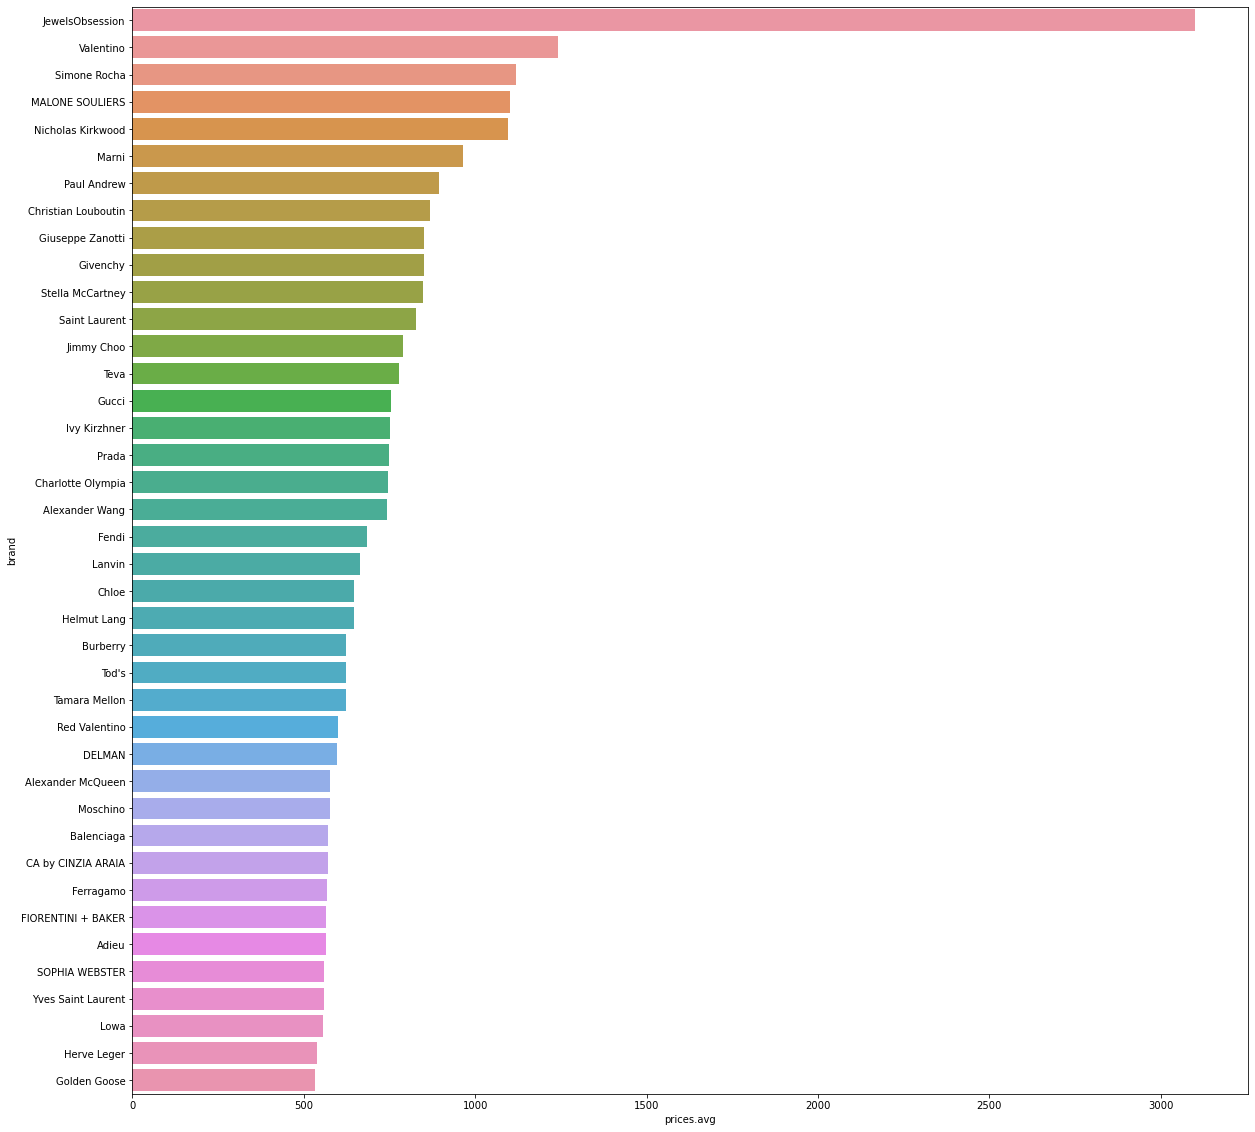

In [285]:
# The 30 most expensive brands
mean_price_by_brand= pd.DataFrame(df.groupby(['brand'])['prices.avg'].mean())
mean_price_by_brand = mean_price_by_brand.reset_index()
df_mean_price = mean_price_by_brand.sort_values(by='prices.avg', ascending=False).head(40)

plt.figure(figsize=(20,20))
#luxury = df_mean_price[df_mean_price['price_category'] == 'luxury'].sort_values(by='prices.avg', ascending=False)
ax = sns.barplot(x="prices.avg", y="brand", data=df_mean_price)

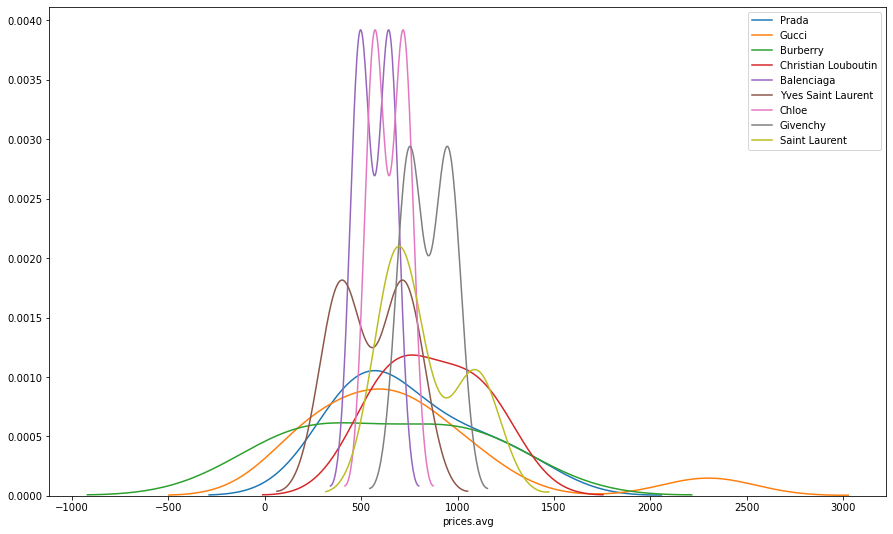

In [280]:
plt.figure(figsize=(15,9))

luxury_brands1 = ['Prada','Gucci','Burberry','Christian Louboutin','Balenciaga','Yves Saint Laurent', 'Chloe', 'Givenchy','Saint Laurent']
for brand in luxury_brands:
    sns.distplot(df[df['brand'] == brand]['prices.avg'], hist=False,label = brand)

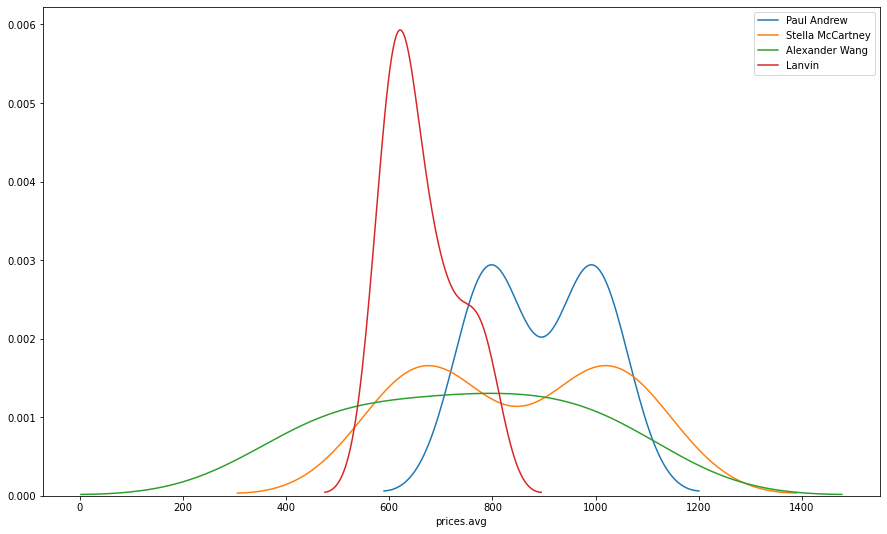

In [284]:
plt.figure(figsize=(15,9))

luxury_brands2 = ['Paul Andrew','Stella McCartney','Alexander Wang','Lanvin']
for brand in luxury_brands2:
    sns.distplot(df[df['brand'] == brand]['prices.avg'], hist=False,label = brand)

In [286]:
#plt.figure(figsize=(15,9))
#can't plot these because they only have one value
#less_known_luxury = ['Simone Rocha','MALONE SOULIERS','Nicholas Kirkwood']
#for brand in less_known_luxury:
    #sns.distplot(df[df['brand'] == brand]['prices.avg'], hist=False,label = brand)

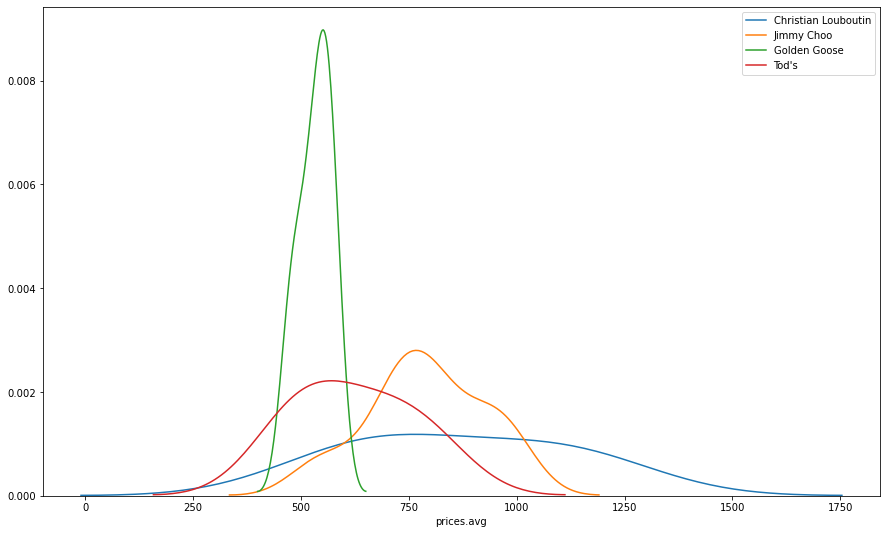

In [274]:
plt.figure(figsize=(15,9))
# YSL - double dip
luxury_shoe_brands = ['Christian Louboutin', 'Jimmy Choo', 'Golden Goose', "Tod's"]
for brand in luxury_shoe_brands:
    sns.distplot(df[df['brand'] == brand]['prices.avg'], hist=False,label = brand)

In [247]:
df['brand'].value_counts()

Nike                  533
Journee Collection    507
Novica                430
TOMS                  406
Easy Spirit           345
                     ... 
Bruno Magli             1
Style & Co              1
BL                      1
MUDD                    1
Posey                   1
Name: brand, Length: 1360, dtype: int64

0 Nike
1 Journee Collection
2 Novica
3 TOMS
4 Easy Spirit
5 Skechers
6 Nine West
7 VANS
8 New Balance
9 Dearfoams
10 Nina
11 Nature Breeze
12 In-Sattva
13 Ralph Lauren
14 Bearpaw
15 MUK LUKS
16 White Mountain
17 Aerosoles
18 Propet
19 Pleaser


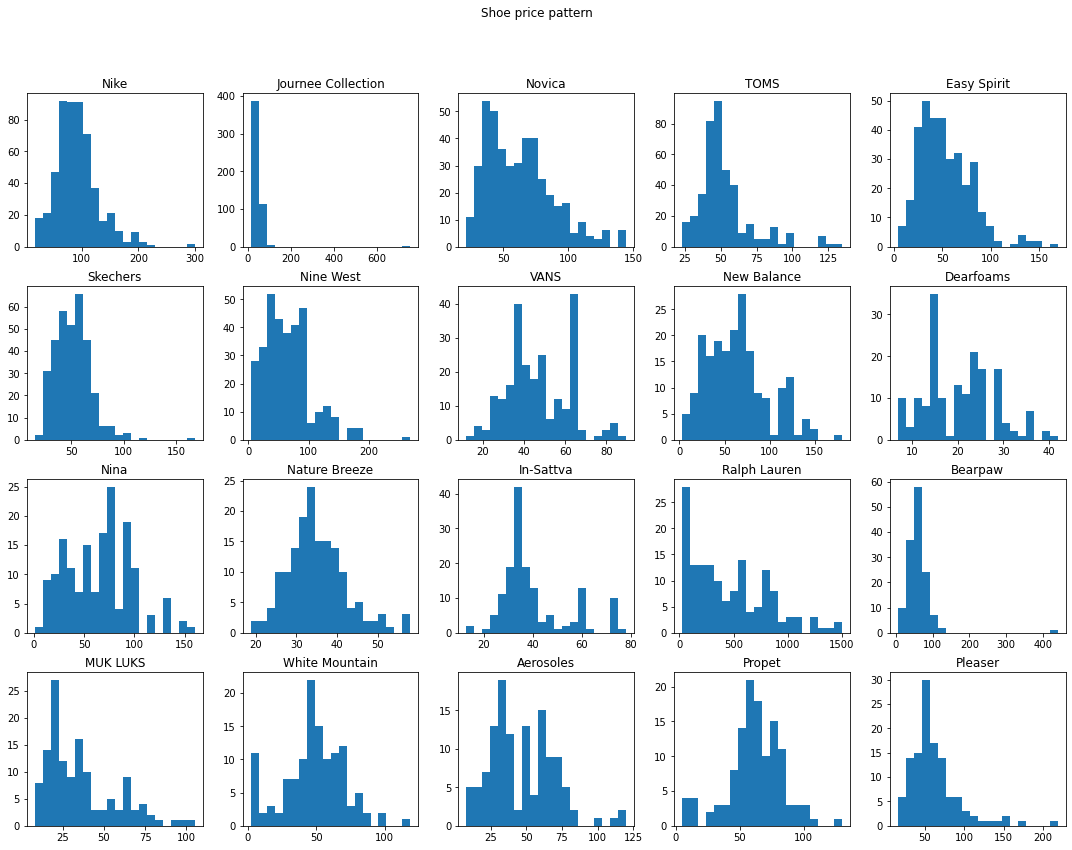

In [290]:
# Now, let's look at brands with the most items. We can see a lot
# We can notice that the double-dip pricing model is much less common
fig,axs = plt.subplots(4,5,figsize=(15,12))


for idx,brand in enumerate(df['brand'].value_counts().sort_values(ascending=False)[0:20].index):
    print(idx,brand)
    axs[idx//5,idx%5].hist(df[df['brand']==brand]['prices.avg'], bins=20)
    axs[idx//5,idx%5].set_title(brand)
plt.suptitle("Shoe price pattern")
plt.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

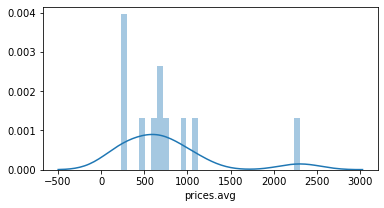

In [187]:
plt.figure(figsize=(6,3))
sns.distplot(df[df['brand'] == 'Gucci']['prices.avg'], bins = 30)

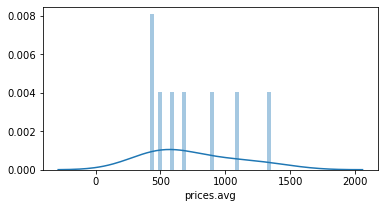

In [188]:
plt.figure(figsize=(6,3))
sns.distplot(df[df['brand'] == 'Prada']['prices.avg'], bins = 30)

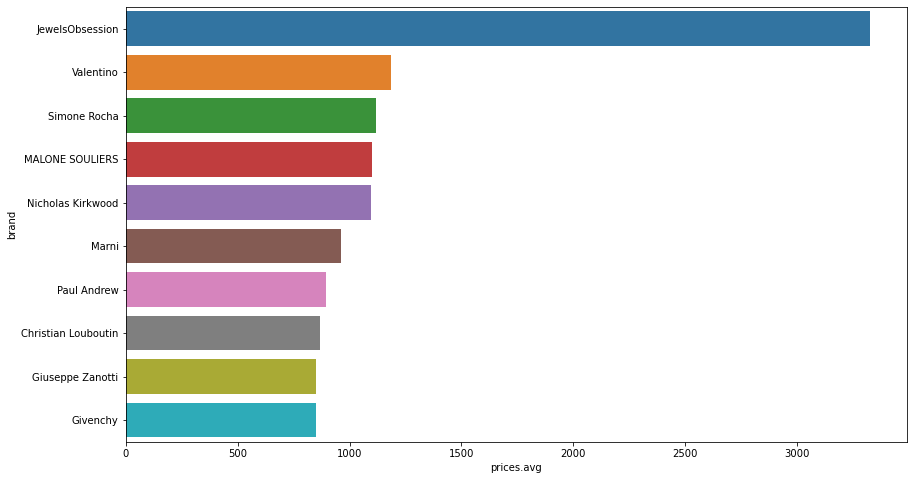

In [133]:
plt.figure(figsize=(14,8))
ax = sns.barplot(x="prices.avg", y="brand", data=expensive)

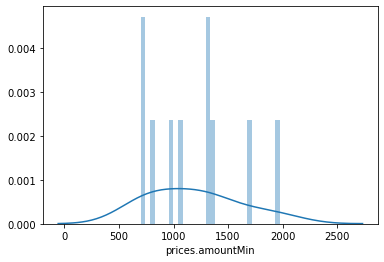

In [66]:
#sns.distplot(df['prices.amountMin'] , bins = 30)
sns.distplot(df[df['brand'] == 'Valentino']['prices.amountMin'], bins = 30)

## Let's split brands according to their mean price ranges.

In [135]:
# Convert currencies to USD
df.loc[df['prices.avg'] == , 'prices.avg'] *= 1.3

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 643 to 541
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   brand       10 non-null     object 
 1   prices.avg  10 non-null     float64
dtypes: float64(1), object(1)
memory usage: 560.0+ bytes


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9123cf53d0>,
        ...,
        ...,
        ...,
       ...,
        ...,
        ...,
        ...,
      dtype=object)

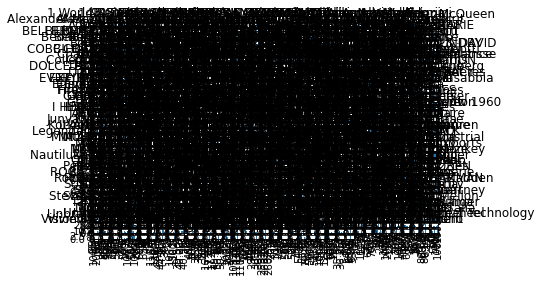

In [136]:
#df['prices.avg'].hist(by=df['brand'])

## Step 4. Clean/Prep the Data
### Do we have duplicates? NA values? Irrelevant variables? If so, let's remove them from our dataset.

In [154]:
df = df[['id', 'brand', 'prices.amountMin','prices.amountMax','prices.isSale', 'prices.currency','imageURLs']]
df.shape

(33801, 7)

### Remove the three duplicate rows.

In [162]:
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)
df = df.drop_duplicates()

Number of duplicate rows:  (0, 7)


,id,brand,prices.amountMin,prices.amountMax,prices.isSale,prices.currency,imageURLs


In [173]:
#df.sort_values(by = 'brand')
#print(df.brand.unique())
print(len(df.brand.unique()), "brands")

1360 brands


### Some brands don't have any values.

In [169]:
df[df.brand.isnull()]

,id,brand,prices.amountMin,prices.amountMax,prices.isSale,prices.currency,imageURLs
12,AVpe_0PU1cnluZ0-bnM4,NaN,70.00,70.00,False,CAD,https://images-na.ssl-images-amazon.com/images...
80,AVpe_82S1cnluZ0-bqR7,NaN,101.00,101.00,False,CAD,https://images-na.ssl-images-amazon.com/images...
84,AVpe_8du1cnluZ0-bqHj,NaN,88.00,88.00,False,CAD,https://images-na.ssl-images-amazon.com/images...
94,AVpe_8tuLJeJML430IyA,NaN,148.00,148.00,False,CAD,https://images-na.ssl-images-amazon.com/images...
102,AVpe_b4Y1cnluZ0-bes6,NaN,164.63,164.63,False,CAD,https://images-na.ssl-images-amazon.com/images...
...,...,...,...,...,...,...,...
24468,AVpjQ1hJLJeJML43tXyw,NaN,9.41,9.41,False,CAD,http://ecx.images-amazon.com/images/I/41iwaR8K...
24484,AVpjQQAd1cnluZ0-U31m,NaN,92.96,92.96,False,CAD,http://ecx.images-amazon.com/images/I/41OwWirI...
24506,AVpjRdY6LJeJML43tdtu,NaN,86.76,86.76,False,CAD,http://ecx.images-amazon.com/images/I/41TXZ8b%...
24516,AVpjRMtHLJeJML43tbJx,NaN,148.00,148.00,False,CAD,https://images-na.ssl-images-amazon.com/images...


### We can remove rows without any brand values, since we're looking at how pricing differs across brands.

In [174]:
df = df[~df.brand.isnull()]
print(df.brand.unique())
print(len(df.brand.unique()), "brands")
df.info()

['Novica' 'Pedi Couture' 'ANNE KLEIN SPORT' ... 'Prince' 'PINUP COUTURE'
 'Amalfi by Rangoni']
1360 brands
<class 'pandas.core.frame.DataFrame'>
Int64Index: 19510 entries, 0 to 33800
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                19510 non-null  object 
 1   brand             19510 non-null  object 
 2   prices.amountMin  19510 non-null  float64
 3   prices.amountMax  19510 non-null  float64
 4   prices.isSale     19510 non-null  bool   
 5   prices.currency   19510 non-null  object 
 6   imageURLs         15750 non-null  object 
dtypes: bool(1), float64(2), object(4)
memory usage: 1.1+ MB


In [164]:
print(df.isnull().sum())

id                     0
brand                983
prices.amountMin       0
prices.amountMax       0
prices.isSale          0
prices.currency        0
imageURLs           3760
dtype: int64


In [122]:
df['prices.availability'].unique()

array([nan, 'TRUE', 'In Stock', 'Out Of Stock', 'YES', 'FALSE', 'yes'],
      dtype=object)

In [125]:
colors = df['prices.color'].unique()
print("We have", len(colors), "different colors, which are the following:")
#for i in range(len(colors)):
    #print(colors[i])

We have 2058 different colors, which are the following:


In [144]:
brands = df1.brand.unique()
print("We have", len(brands), "different brands, which are the following:")
#brands

We have 964 different brands, which are the following:


In [143]:
categories = df1.categories.unique()
print("We have", len(categories), "different categories, which are the following:")
#categories

We have 53 different categories, which are the following:


### Hmmm.. at first it looks like we have 53 different categories but when we actually print out all the values, they actually turn out to be more of subcategories within Men's/Women's shoes. 

### We can come back to this later (maybe split that column into two: M/F and Shoe Type). But for now, let's look at pricing. First, what is the average shoe price in this entire dataset? But before that, what's the difference between prices.amountMin and prices.amountMax? (check documentation: https://developer.datafiniti.co/docs/product-data-schema). amountMin and amountMax are typically the same, except in cases where a price range is listed. Let's use amountMin for prices then.

### As shown below, the distribution is extremely right-skewed. The median (\\$49.99) is lower than the mean (\\$66.13). The median tells us that half of the prices are less than or equal to \\$49.99; and we can see from the graph that most prices lie between \\$0-200. The max value tells us that the most expensive shoe costs \\$754.8, which is astonishingly high! (add a statistic about \\$754.8).

count    33798.000000
mean        87.658430
std        146.164475
min          0.010000
25%         33.990000
50%         52.990000
75%         89.000000
max       4270.000000
Name: prices.amountMin, dtype: float64


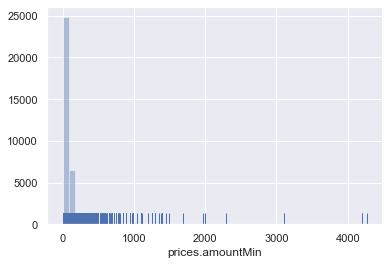

In [127]:
#df['prices.amountMin'].hist(bins=80)
sns.distplot(df['prices.amountMin'], kde=False, rug=True)
print(df['prices.amountMin'].describe())

### We can split out prices into buckets of //$100 ranges. Or take top 5% percentile? TBD

In [129]:
expensive = df[df['prices.amountMin']>400]
expensive.head(2)

,id,asins,brand,categories,colors,count,dateAdded,dateUpdated,descriptions,dimension,...,skus,sourceURLs,upc,vin,websiteIDs,weight,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
144,AVpe_CllLJeJML43z0lJ,NaN,Lanvin,"Sneakers,Designer Collections,Women,Designer S...",NaN,NaN,2016-03-29T21:30:47Z,2016-03-29T21:51:13Z,NaN,NaN,...,NaN,http://shop.nordstrom.com/s/lanvin-cap-toe-sue...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,AVpe_iMBilAPnD_xSjo9,NaN,Christian Louboutin,"Women,Designer Collections,Designer Shoes,Sandals",NaN,NaN,2016-03-30T18:42:04Z,2016-03-30T18:42:04Z,NaN,NaN,...,NaN,http://shop.nordstrom.com/s/christian-loubouti...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
expensive.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateAdded',
       'dateUpdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageURLs', 'isbn', 'keys', 'manufacturer',
       'manufacturerNumber', 'merchants', 'name', 'prices.amountMin',
       'prices.amountMax', 'prices.availability', 'prices.color',
       'prices.condition', 'prices.count', 'prices.currency',
       'prices.dateAdded', 'prices.dateSeen', 'prices.flavor', 'prices.isSale',
       'prices.merchant', 'prices.offer', 'prices.returnPolicy',
       'prices.shipping', 'prices.size', 'prices.source', 'prices.sourceURLs',
       'prices.warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceURLs', 'upc', 'vin', 'websiteIDs', 'weight', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51'],
      dtype='object')

In [131]:
expensive.brand.unique()

array(['Lanvin', 'Christian Louboutin', 'Saint Laurent',
       'Salvatore Ferragamo', 'Ralph Lauren', 'Fratelli Rossetti',
       'Dr. Martens Air Wair', 'Journee Collection', 'Prada', nan,
       'Gucci', 'Lane Boots', 'Alexander Wang', 'Lowa', 'Valentino',
       "Tod's", 'Diane von Furstenberg', 'Pas De Rouge',
       'Cesare Paciotti', 'Stella McCartney', 'MCM', 'Dan Post', 'Marni',
       'Robert Clergerie', 'MALONE SOULIERS', 'Missoni',
       'Rupert Sanderson', 'Helmut Lang', 'Dolce&Gabbana', 'Herve Leger',
       'Santoni', 'Donald J Pliner', 'Alexander McQueen',
       'Manolo Blahnik', 'Yves Saint Laurent', 'Adieu', 'Chloe', 'Fiel',
       'FIORENTINI + BAKER', 'CA by CINZIA ARAIA', 'See By Chloe',
       'Emporio Armani', 'Patrizia Pepe', 'Tamara Mellon', 'Paul Andrew',
       'Givenchy', 'Fendi', 'Marc By Marc Jacobs', 'Gentle Souls',
       'Dolce & Gabbana', 'Red Valentino', 'Jimmy Choo', 'Aquatalia',
       'Sebastian Milano', 'Moschino', 'Golden Goose',
       'Vivien

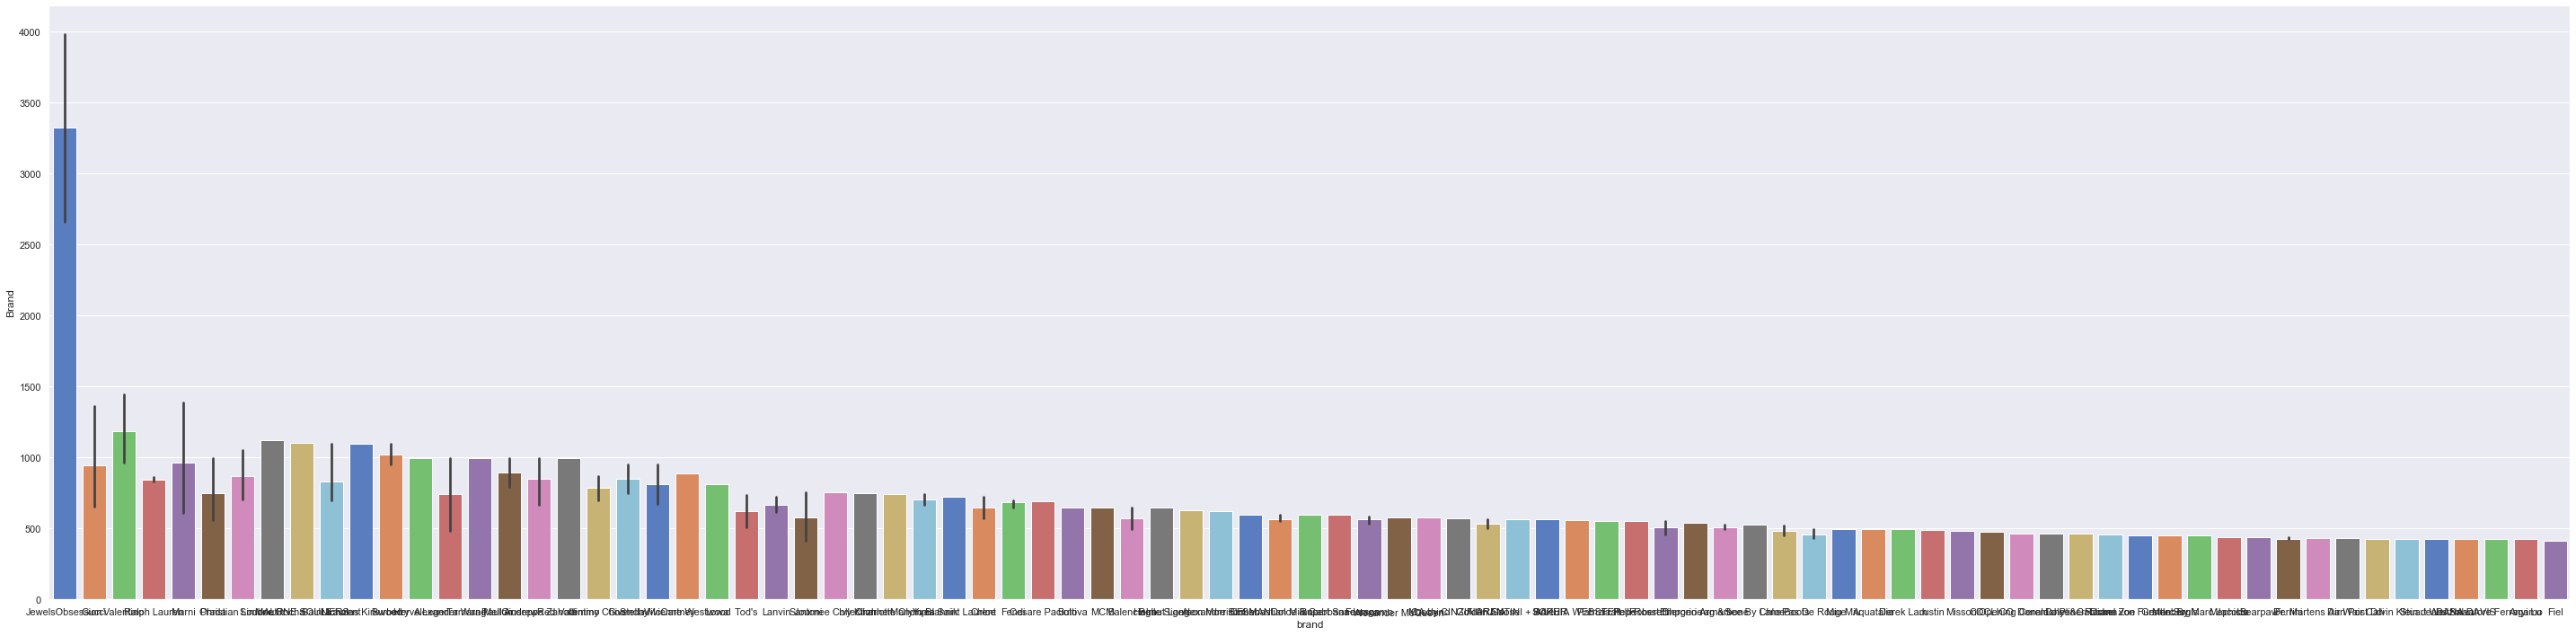

In [139]:
# Draw a nested barplot to show survival for class and sex
sorted_expensive = expensive.sort_values(by = "prices.amountMin", ascending = False)
#plt.figure(figsize=(16, 30))
g = sns.catplot(x="brand", y="prices.amountMin", data=sorted_expensive,
                height=10, kind="bar", palette="muted",aspect=4)
g.despine(left=True)
g.set_ylabels("Brand")

       count  ean  flavors  isbn  prices.amountMin  prices.amountMax  \
count    0.0  0.0      0.0   0.0         10.000000         10.000000   
mean     NaN  NaN      NaN   NaN       1186.998000       1186.998000   
std      NaN  NaN      NaN   NaN        424.621332        424.621332   
min      NaN  NaN      NaN   NaN        699.990000        699.990000   
25%      NaN  NaN      NaN   NaN        845.000000        845.000000   
50%      NaN  NaN      NaN   NaN       1170.000000       1170.000000   
75%      NaN  NaN      NaN   NaN       1355.000000       1355.000000   
max      NaN  NaN      NaN   NaN       1975.000000       1975.000000   

       prices.count  prices.flavor  prices.source  prices.warranty  upc  vin  \
count           0.0            0.0            0.0              0.0  0.0  0.0   
mean            NaN            NaN            NaN              NaN  NaN  NaN   
std             NaN            NaN            NaN              NaN  NaN  NaN   
min             NaN            

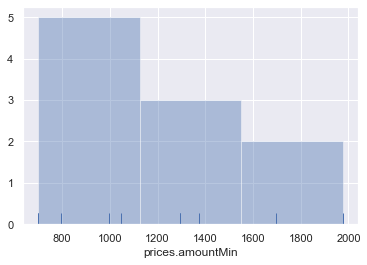

In [140]:
valentino_price = df[df['brand'] == 'Valentino']
sns.distplot(valentino_price['prices.amountMin'], kde=False, rug=True)
print(valentino_price.describe())

In [141]:
valentino_price

,id,asins,brand,categories,colors,count,dateAdded,dateUpdated,descriptions,dimension,...,skus,sourceURLs,upc,vin,websiteIDs,weight,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
1309,AVpe6r4fLJeJML43yP-z,NaN,Valentino,"Designer Collections,Sandals,Women,Designer Shoes",NaN,NaN,2016-03-30T17:04:47Z,2016-03-30T18:20:46Z,NaN,NaN,...,NaN,"http://shop.nordstrom.com/s/4128018,http://sho...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2234,AVpe9fND1cnluZ0-aymI,NaN,Valentino,"Women,Designer Collections,Designer Shoes",NaN,NaN,2016-03-29T22:21:59Z,2016-03-29T22:21:59Z,NaN,NaN,...,NaN,http://shop.nordstrom.com/s/valentino-bow-over...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8152,AVpfiwRmLJeJML43_GAM,NaN,Valentino,"Women,Designer Collections,Designer Shoes,Snea...",NaN,NaN,2016-03-29T21:46:12Z,2016-03-29T21:46:12Z,NaN,NaN,...,NaN,http://shop.nordstrom.com/s/valentino-lace-sne...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9703,AVpfMi9uLJeJML434bQ2,NaN,Valentino,"Women,Designer Collections,Designer Shoes",NaN,NaN,2016-03-29T22:26:48Z,2016-03-29T22:26:48Z,NaN,NaN,...,NaN,http://shop.nordstrom.com/s/valentino-rolling-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15892,AVpgceMvLJeJML43N_NO,NaN,Valentino,"Designer Collections,Women,Sandals,Designer Shoes",NaN,NaN,2016-03-30T14:22:48Z,2016-03-30T17:04:50Z,NaN,NaN,...,NaN,http://shop.nordstrom.com/s/valentino-rockstud...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15893,AVpgceMvLJeJML43N_NO,NaN,Valentino,"Designer Collections,Women,Sandals,Designer Shoes",NaN,NaN,2016-03-30T14:22:48Z,2016-03-30T17:04:50Z,NaN,NaN,...,NaN,http://shop.nordstrom.com/s/valentino-rockstud...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19521,AVph__hTLJeJML43hITi,NaN,Valentino,"Women,Designer Collections,Designer Shoes,Sandals",NaN,NaN,2016-03-30T16:49:21Z,2016-03-30T16:49:21Z,NaN,NaN,...,NaN,http://shop.nordstrom.com/s/valentino-noir-roc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19543,AVph_t6Z1cnluZ0-IqK3,NaN,Valentino,"Designer Collections,Women,Designer Shoes",NaN,NaN,2016-03-29T22:16:55Z,2016-03-29T22:26:49Z,NaN,NaN,...,NaN,http://shop.nordstrom.com/s/valentino-rockstud...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25898,AVqCJnS6v8e3D1O-lSpZ,NaN,Valentino,"Sandals,Shoes,Women's Shoes",Grey,NaN,2017-02-28T00:37:22Z,2017-03-28T11:40:25Z,"[{""dateSeen"":[""2017-03-25T09:19:24.193Z""],""sou...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Clo...",https://www.overstock.com/Clothing-Shoes/Valen...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25899,AVqCJnS6v8e3D1O-lSpZ,NaN,Valentino,"Sandals,Shoes,Women's Shoes",Grey,NaN,2017-02-28T00:37:22Z,2017-03-28T11:40:25Z,"[{""dateSeen"":[""2017-03-25T09:19:24.193Z""],""sou...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Clo...",https://www.overstock.com/Clothing-Shoes/Valen...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Loo

In [13]:
df1.isna()

,id,asins,brand,categories,ean,manufacturerNumber,name,prices.amountMax,prices.amountMin,prices.availability,...,prices.dateSeen,prices.flavor,prices.isSale,prices.merchant,prices.offer,prices.returnPolicy,prices.shipping,prices.size,prices.sourceURLs,upc
0,False,True,False,False,True,False,False,False,False,True,...,False,True,False,True,True,True,True,True,False,True
1,False,True,False,False,True,False,False,False,False,True,...,False,True,False,True,True,True,True,True,False,True
2,False,True,False,False,True,False,False,False,False,True,...,False,True,False,True,True,True,True,True,False,True
3,False,True,False,False,True,False,False,False,False,True,...,False,True,False,True,True,True,True,True,False,True
4,False,True,False,False,True,False,False,False,False,True,...,False,True,False,True,True,True,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39367,False,True,False,False,False,False,False,False,False,True,...,False,True,False,False,True,True,True,True,False,False
39368,False,True,False,False,False,False,False,False,False,True,...,False,True,False,True,False,True,True,True,False,False
39369,False,True,False,False,False,False,False,False,False,True,...,False,True,False,False,True,True,True,True,False,False
39370,False,True,False,False,False,False,False,False,False,True,...,False,True,False,True,False,True,True,True,False,False


In [7]:
# What is the average price of each distinct brand listed?
df1.groupby(['brand'])['prices.amountMin'].mean()

brand
143 Girl         21.886000
2 Lips Too       41.858667
29 Porter Rd     32.325000
301-42 SW-SM     24.000000
361              83.950000
                   ...    
madden girl      48.745000
melissa         169.990000
r.b.l.s.         20.714167
totes            40.974000
zephz            49.950000
Name: prices.amountMin, Length: 964, dtype: float64

### Now let's look at the average prices by brand. 
#### Louboutin, Valentino and Ferragamo were the most expensive luxury brands, with Ferragamo boasting an average price of $701.49!

In [10]:
avg = pd.DataFrame(df1.groupby(['brand'])['prices.amountMin'].mean())
#avg['brand']=avg.index
avg = avg.reset_index()
#avg
expensive = avg.sort_values(by='prices.amountMin', ascending=False).head(10)
expensive

,brand,prices.amountMin
194,Christian Louboutin,701.490
894,Valentino,699.990
349,Ferragamo,586.753
683,Prada,449.888
140,Brian Atwood,351.995
278,Dolce & Gabbana,350.990
643,Old Gringo,350.594
582,Miu Miu,344.490
192,Chloe,342.990
107,Belle Sigerson Morrison,336.660


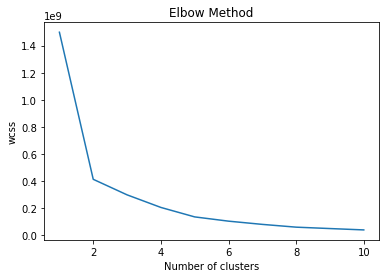

In [46]:
'''Age and spending Score'''
X1 = df[['prices.amountMin' , 'prices.amountMax']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='full') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)
    
plt.plot(range(1,11),inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

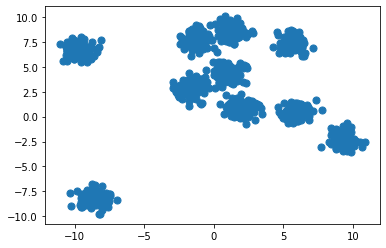

In [54]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=1000, centers = 10,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

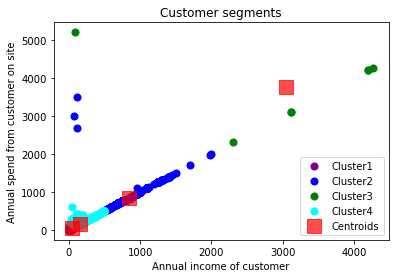

In [48]:
##Fitting kmeans to the dataset with k=4
km4=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X1)
#Visualizing the clusters for k=4
plt.scatter(X1[y_means==0,0],X1[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X1[y_means==1,0],X1[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X1[y_means==2,0],X1[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X1[y_means==3,0],X1[y_means==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()